In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
file = "img/bitmap.pbm"
img = cv2.imread(file,0)
img = img/255
img = 1-img
print(np.max(img))

1.0


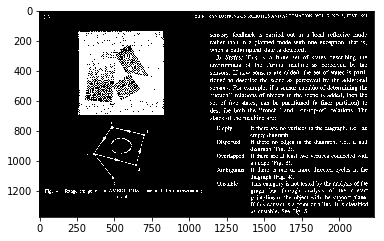

In [17]:
fig = plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

In [18]:
kernel1 = np.ones((100,1),np.uint8)


kernel2 = np.ones((1,200),np.uint8)

print(kernel1.shape)
print(kernel2.shape)

(100, 1)
(1, 200)


In [19]:
dilate = cv2.dilate(img,kernel1)
erode = cv2.erode(dilate,kernel1)

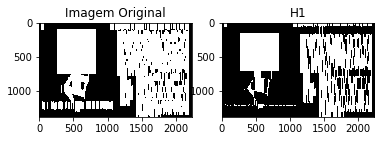

In [20]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(dilate,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(erode,cmap="gray")
a.set_title('H1')

plt.show()

In [21]:
dilate2 = cv2.dilate(img,kernel2)
erode2 = cv2.dilate(dilate2,kernel2)

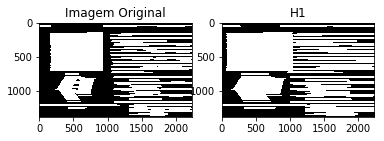

In [22]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(dilate2,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(erode2,cmap="gray")
a.set_title('H1')

plt.show()

In [23]:
img5 = cv.bitwise_and(erode,erode2)

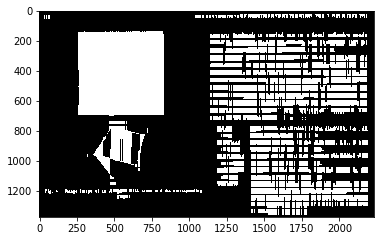

In [24]:
fig = plt.figure()
plt.imshow(img5,cmap="gray")
plt.show()

In [25]:
kernel3 = np.ones((30,1),np.uint8)
closing = cv2.morphologyEx(img, cv.MORPH_CLOSE, kernel3)

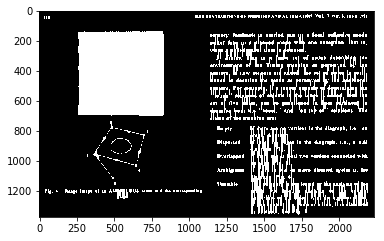

In [26]:
fig = plt.figure()
plt.imshow(closing,cmap="gray")
plt.show()

True

In [117]:
closing = closing.astype(np.uint8)

ret, labels = cv2.connectedComponents(closing)

In [118]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

print(ret)

555


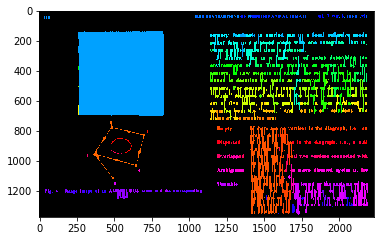

In [119]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

In [120]:
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

In [121]:
cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

boxes = []
for contour in cnts:
    boxes.append(cv2.boundingRect(contour))

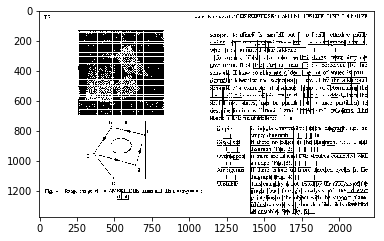

In [124]:
for i in boxes:
    comps = cv2.rectangle(img,(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(1))
fig = plt.figure()
plt.imshow(1-comps,cmap="gray")
plt.show()

In [125]:
cv.imwrite("dilate.pbm",1-dilate)
cv.imwrite("erode.pbm",1-erode)
cv.imwrite("dilate2.pbm",1-dilate2)
cv.imwrite("erode2.pbm",1-erode2)
cv.imwrite("img5.pbm",1-img5)
cv.imwrite("closing.pbm",1-closing)
cv.imwrite("comps.pbm",1-comps)

True